In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

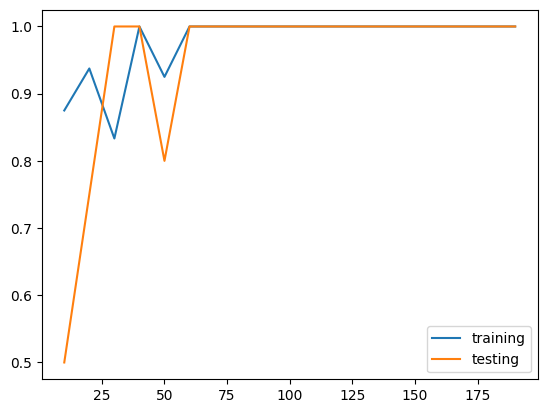

In [7]:
# load data
data = pd.read_csv('results/bongard_scaling.csv')

# plot 
training_data = data[data['type'] == 'training']
testing_data = data[data['type'] == 'testing']

# plot training data
plt.plot(training_data['total_examples'], training_data['accuracy'],label='training')
plt.plot(testing_data['total_examples'], testing_data['accuracy'],label='testing')
plt.legend()


In [2]:
# Load the json results data
with open('results/resultsGraph.json') as f:
    dataGraph = json.load(f)

with open('results/resultsGraphEdges.json') as f:
    dataEdges = json.load(f)

with open('results/resultsGraphKlog.json') as f:
    dataKlog = json.load(f)

In [3]:
# Plot the results for data size
size_data = dataGraph["Size results GIN"]
sizes = np.array(list(size_data.keys()) + [392])
accuracies = np.array([size_data[i]["Accuracy"] for i in size_data.keys()] + [dataGraph['GIN']["Accuracy"]])
std_all = np.array([size_data[i]["std all"] for i in size_data.keys()] + [dataGraph['GIN']["std all"]])
std_complete = np.array([size_data[i]["std complete"] for i in size_data.keys()] + [dataGraph['GIN']["std complete"]])

# Edges results
size_data_edges = dataEdges["Size results GINE"]
sizes_edges = np.array([size_data_edges[i] for i in size_data_edges.keys()] + [392])
accuracies_edges = np.array([size_data_edges[i]["Accuracy"] for i in size_data_edges.keys()] + [dataEdges['GINE']["Accuracy"]])
std_all_edges = np.array([size_data_edges[i]["std all"] for i in size_data_edges.keys()] + [dataEdges['GINE']["std all"]])
std_complete_edges = np.array([size_data_edges[i]["std complete"] for i in size_data_edges.keys()] + [dataEdges['GINE']["std complete"]])

# Klog results
size_data_klog = dataKlog["Size results GIN"]
accuracies_klog = np.array([size_data_klog[i]["Accuracy"] for i in size_data_klog.keys()] + [dataKlog['GIN']["Accuracy"]])
std_all_klog = np.array([size_data_klog[i]["std all"] for i in size_data_klog.keys()] + [dataKlog['GIN']["std all"]])
std_complete_klog = np.array([size_data_klog[i]["std complete"] for i in size_data_klog.keys()] + [dataKlog['GIN']["std complete"]])


6
6
6


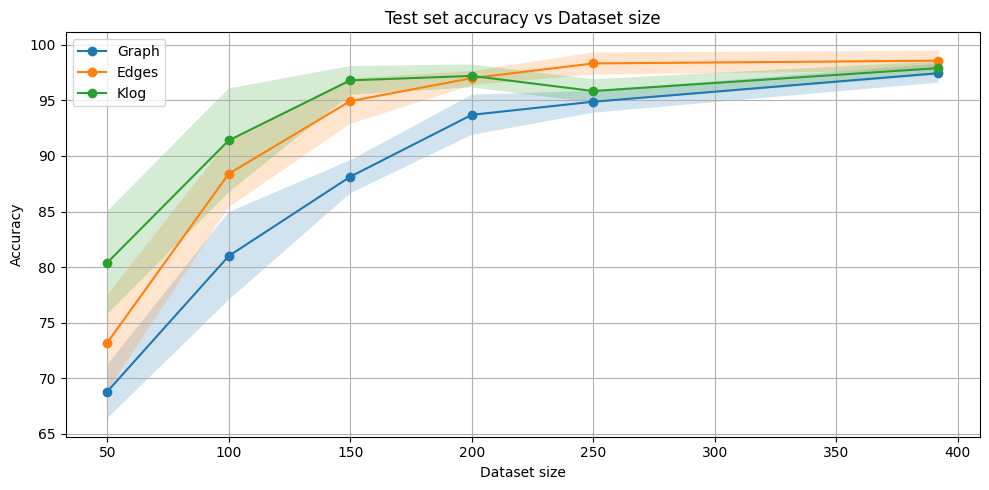

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

# add standard deviation bands to the plot
sizes = [int(i) for i in sizes]
print(len(sizes))
print(len(accuracies))
print(len(std_all))
ax.plot(sizes, accuracies, 'o-', label="Graph")

ax.fill_between(sizes, np.array(accuracies) - np.array(std_all), np.array(accuracies) + np.array(std_all), alpha=0.2)

ax.plot(sizes, accuracies_edges, 'o-',label="Edges")
ax.fill_between(sizes, accuracies_edges - std_all_edges, accuracies_edges + std_all_edges, alpha=0.2)

ax.plot(sizes, accuracies_klog, 'o-',label="Klog")
ax.fill_between(sizes, accuracies_klog - std_all_klog, accuracies_klog + std_all_klog, alpha=0.2)

ax.set_ylabel("Accuracy")
ax.set_xlabel("Dataset size")
ax.set_title("Test set accuracy vs Dataset size")
ax.legend()
ax.grid()

fig.tight_layout()



In [5]:
graphKlog = pd.read_csv("results/GraphKlog.csv")
graphKlog.head()

# plot the test_acc with std on same plot std band



,Name,State,Notes,User,Tags,Created,Runtime,Sweep,batch_size,dataset_size,...,layers,repetitions,start_lr,best_test_acc,best_val_acc,epoch,lr,test_acc,train_acc,val_acc
0,deft-sweep-96,finished,-,nicolas-debie,NaN,2023-11-13T21:51:52.000Z,20,tdztg2wo,64,200,...,5,NaN,0.01,NaN,NaN,171,0.00001,0.96,1,1.0
1,zesty-sweep-95,finished,-,nicolas-debie,NaN,2023-11-13T21:51:31.000Z,18,tdztg2wo,64,200,...,4,NaN,0.01,NaN,NaN,199,0.00001,1.00,1,1.0
2,icy-sweep-94,finished,-,nicolas-debie,NaN,2023-11-13T21:51:05.000Z,21,tdztg2wo,64,200,...,3,NaN,0.01,NaN,NaN,199,0.00001,1.00,1,1.0
3,splendid-sweep-93,finished,-,nicolas-debie,NaN,2023-11-13T21:50:44.000Z,15,tdztg2wo,64,200,...,2,NaN,0.01,NaN,NaN,199,0.00001,1.00,1,1.0
4,leafy-sweep-92,finished,-,nicolas-debie,NaN,2023-11-13T21:50:23.000Z,19,tdztg2wo,64,200,...,5,NaN,0.01,NaN,NaN,199,0.00001,1.00,1,1.0


In [6]:
# visualise the graph representations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch_geometric.utils.convert import to_networkx
from datasets.Bongard.BongardDataset import BongardDataset

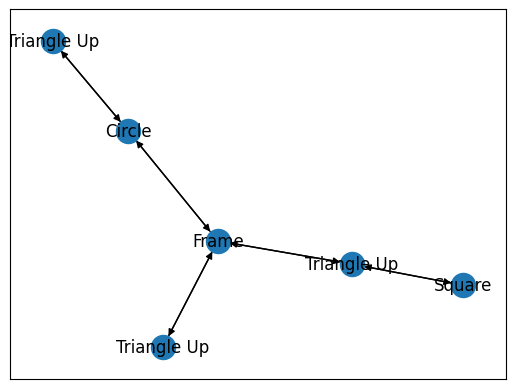

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

graph = BongardDataset(root="datasets/Bongard/GraphFour").get(0)

G = to_networkx(graph)
pos = nx.spring_layout(G)


labels = {}
for i in G.nodes:
    if graph.x[i].item() == 0:
        labels[i] = f"Frame"
    elif graph.x[i].item() == 1:
        labels[i] = f"Square"
    elif graph.x[i].item() == 2:
        labels[i] = f"Circle"
    elif graph.x[i].item() == 3:
        labels[i] = f"Triangle Up"
    elif graph.x[i].item() == 4:
        labels[i] = f"Triangle Down"


nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos,labels=labels)
nx.draw_networkx_edges(G,pos)

plt.legend([])
plt.show()




process
0
1
2
3
4
5


Processing...
Done!


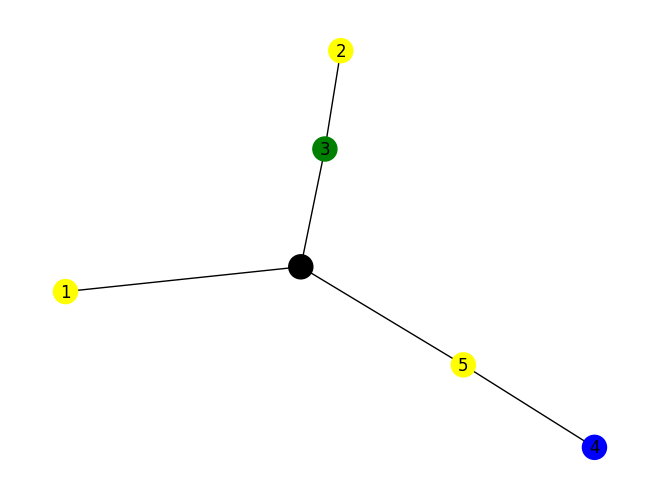

In [ ]:
import matplotlib.pyplot as plt

Graphs = BongardDataset(root="datasets/Bongard/Graph/")
graph = Graphs[0]

background = [1,0,0,0,0]
square = [0,1,0,0,0]
circle = [0,0,1,0,0]
triangle_up = [0,0,0,1,0]
triangle_down = [0,0,0,0,1]

node_colors = []
node_labels = {}

for i in range(0,len(graph.x)):
    print(i)
    if torch.equal(graph.x[i], torch.tensor(background)):
        node_colors.append("Black")
        node_labels[i] = "Frame"
    elif torch.equal(graph.x[i], torch.tensor(square)):
        node_colors.append("blue")
        node_labels[i] = "Square"
    elif torch.equal(graph.x[i], torch.tensor(circle)):
        node_colors.append("green")
        node_labels[i] = "Circle"
    elif torch.equal(graph.x[i], torch.tensor(triangle_up)):
        node_colors.append("yellow")
        node_labels[i] = "Triangle Up"
    elif torch.equal(graph.x[i], torch.tensor(triangle_down)):
        node_colors.append("orange")
        node_labels[i] = "Triangle Down"

G = to_networkx(graph, to_undirected=True)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors)

